In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'C:\Users\elise\Documents\SPRING 2022 CLASSESS\ITSC 3162\Project 3\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
for i in df["LotShape"]:
    if df["LotShape"].any()=='Reg':
        df["LotShape"] = 0
    if df["LotShape"].any() == 'IR1':
        df["LotShape"] = 1
    if df["LotShape"].any() == 'IR2':
        df["LotShape"] = 2
    if df["LotShape"].any() == 'IR3':
        df["LotShape"] = 3

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

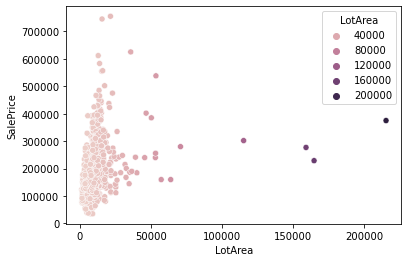

In [49]:
sns.scatterplot(data=df, x="LotArea", y="SalePrice", hue='LotArea')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

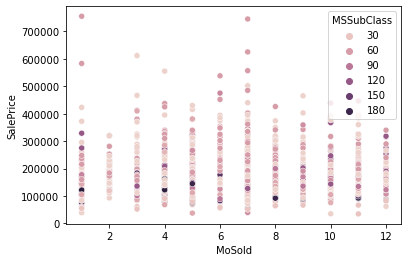

In [17]:
sns.scatterplot(data=df, x="MoSold", y="SalePrice", hue='MSSubClass')

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

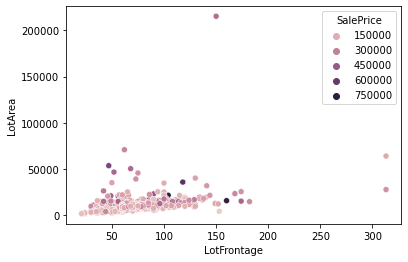

In [3]:
sns.scatterplot(data=df, x="LotFrontage", y="LotArea", hue='SalePrice')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

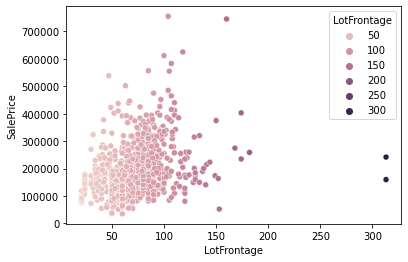

In [12]:
sns.scatterplot(data=df, x="LotFrontage", y="SalePrice", hue='LotFrontage')

<AxesSubplot:xlabel='LotShape', ylabel='LotArea'>

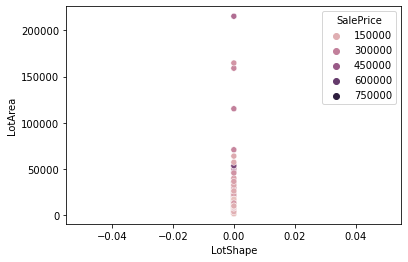

In [8]:
sns.scatterplot(data=df, x="LotShape", y="LotArea", hue='SalePrice')

In [7]:
df['LotFrontage'].isnull().sum()

0

In [5]:
mean=df['LotFrontage'].mean()

In [6]:
df['LotFrontage'].fillna(value=mean, inplace=True)

In [8]:
df['LotFrontage'].isnull().sum()

0

In [9]:
df['LotArea'].isnull().sum()

0

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

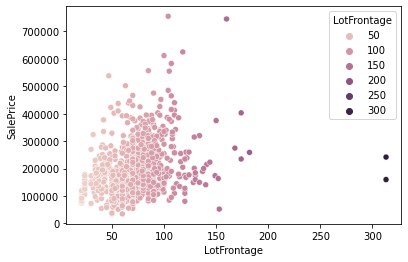

In [29]:
sns.scatterplot(data=df, x="LotFrontage", y="SalePrice", hue='LotFrontage')

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

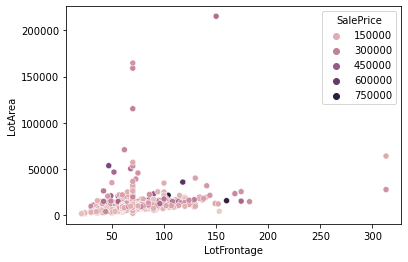

In [30]:
sns.scatterplot(data=df, x="LotFrontage", y="LotArea", hue='SalePrice')

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df = df.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition' ], axis=1)

In [12]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'SalePrice'], dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
mean=df['LotFrontage'].mean()
df['LotFrontage'].fillna(value=mean, inplace=True)

In [45]:
df['LotFrontage'].isnull().sum()

0

In [46]:
df['LotArea'].isnull().sum()

0

In [47]:
df['SalePrice'].isnull().sum()

0

In [14]:
X = df[['LotArea','LotFrontage']]
y = df['SalePrice']
len(X) == len(y)

True

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [16]:
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [   1.64959168 1028.15184629]
Intercept: 
 91789.55034537929


In [50]:
len(X_train)

1022

In [51]:
len(y_train)

1022

In [52]:
len(X_test)

438

In [53]:
len(y_test)

438

In [54]:
regr = linear_model.LinearRegression()

In [61]:
regr.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = regr.predict(X_test)

Coefficients: 
 [  1.77094082 885.69398347]
Mean squared error: 4944369026.37
Coefficient of determination: 0.17


ValueError: x and y must be the same size

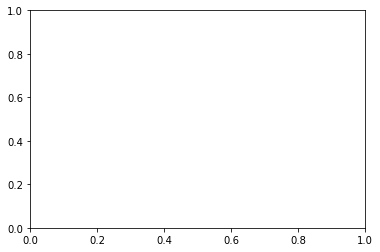

In [57]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [58]:
X_train.shape

(1022, 2)

In [59]:
y_train.shape

(1022,)

In [ ]:
#what can be used to predict the price
#1.LotArea

In [3]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

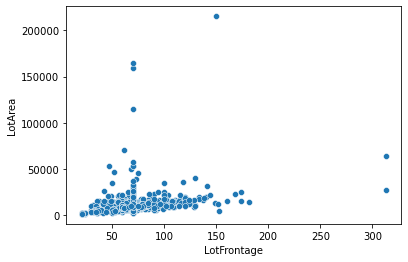

In [47]:
sns.scatterplot(data=df, x="LotFrontage", y="LotArea")

<AxesSubplot:xlabel='OverallQual', ylabel='LotArea'>

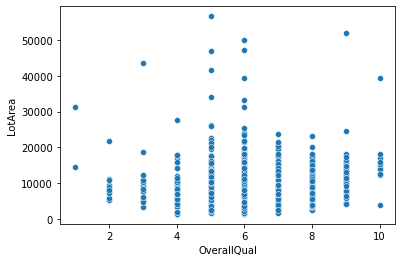

In [5]:
sns.scatterplot(data=df, x="OverallQual", y="LotArea")
#if a house quality is rated 10 then its more likely to have the proximity of x<20000 but x>10000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [19]:
df.corr?

Signature: df.corr(method='pearson', min_periods=1) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.

        .. versionadded:: 0.24.0

min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.

Returns
-------
DataFrame
    Correlation matrix.

See Also
--------
DataFrame.corrwith : Compute pairwise correlation with another
    DataFrame or 

In [59]:
#features = list(df._get_numeric_data().columns)
features = list(df[['LotArea','LotFrontage']])
dim_df = df[features]

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
x = dim_df.values
x = StandardScaler().fit_transform(x)

In [62]:
x

array([[-0.20714171, -0.22937175],
       [-0.09188637,  0.4519361 ],
       [ 0.07347998, -0.09311018],
       ...,
       [-0.14781027, -0.18395123],
       [-0.08016039, -0.09311018],
       [-0.05811155,  0.22483348]])

In [63]:
from sklearn.decomposition import PCA #for PCA

In [64]:
pca = PCA(n_components = 2, random_state = 7) # reduce to 2 dimensions 

#use the pca to tranform your data
pca_mdl = pca.fit_transform(x)

In [65]:
pca_mdl.shape

(1460, 2)

In [66]:
pca_df = pd.DataFrame(pca_mdl)
pca_df.head()

,0,1
0,-0.308662,0.015719
1,0.254594,-0.384541
2,-0.013881,0.117797
3,-0.391293,0.254259
4,0.713306,-0.182766


<AxesSubplot:xlabel='0', ylabel='1'>

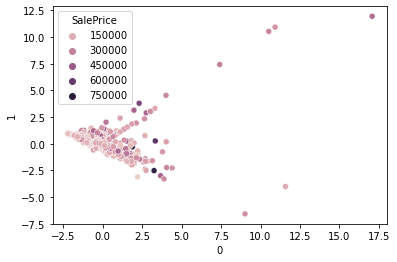

In [67]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['SalePrice'])

In [69]:
pca = PCA(n_components = 2, random_state = 7) # reduce to 3 dimensions
pca_mdl = pca.fit_transform(x)

In [70]:
pca_df = pd.DataFrame(pca_mdl)
pca_df.head()

,0,1
0,-0.308662,0.015719
1,0.254594,-0.384541
2,-0.013881,0.117797
3,-0.391293,0.254259
4,0.713306,-0.182766


In [71]:
from mpl_toolkits.mplot3d import Axes3D

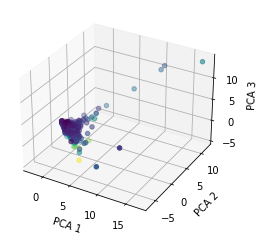

In [82]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca_df[0]
y = pca_df[1]

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(x, y, z, c = df['SalePrice'])

plt.show()

In [74]:
from sklearn.model_selection import train_test_split
import time # used for seeing the timing of models
from sklearn.linear_model import LogisticRegression

In [75]:
x_train, x_test, y_train, y_test = train_test_split(df, df['SalePrice'])

In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1095, 4), (365, 4), (1095,), (365,))

In [77]:
scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [78]:
model = LogisticRegression()

In [80]:
total_time = 0
accuracy = 0

for i in range(0,1000):
    
    start = time.time()
    model.fit(x_train, y_train)
    stop = time.time()
    
    total_time = total_time + (stop - start)
    accuracy = accuracy + model.score(x_test, y_test)

C:\Users\elise\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\elise\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 